In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_parquet("lumen_dataset/data/lumen")
dataset.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
0,0,2015-07-01,2015-01-21,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152
1,0,2015-07-01,2015-06-10,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906
2,0,2015-07-01,2015-05-13,2015-07-02,None,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896
3,0,2015-07-01,2014-05-30,2015-07-02,None,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245
4,0,2015-07-01,2014-07-06,2015-07-03,None,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   hotel_id                       119210 non-null  int32         
 1   datum_dolaska                  119210 non-null  datetime64[ns]
 2   datum_kreiranja_rezervacije    119210 non-null  datetime64[ns]
 3   datum_odjave                   119210 non-null  datetime64[ns]
 4   datum_otkazivanja_rezervacije  44199 non-null   object        
 5   broj_odraslih_gostiju          119210 non-null  int64         
 6   broj_djece_gostiju             119210 non-null  float64       
 7   zemlja_gosta                   119210 non-null  object        
 8   kanal_prodaje_id               119210 non-null  int32         
 9   tip_sobe_id                    119210 non-null  int32         
 10  cijena_nocenja                 119210 non-null  float64       
 11  

# Detaljan pregled dolazaka po mesecima

In [3]:
dataset['datum_dolaska'] = pd.to_datetime(dataset['datum_dolaska'])
dataset['arrival_month'] = dataset['datum_dolaska'].dt.month
dataset['arrival_year'] = dataset['datum_dolaska'].dt.year
monthly_arrivals = dataset.groupby('arrival_month').size()

## Pregled dolazaka po mesecima za sve hotele i sve godine

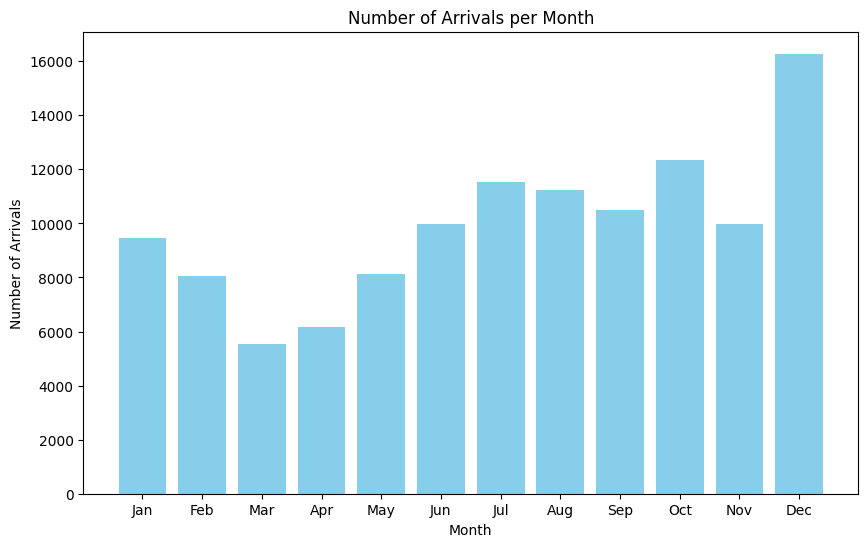

In [4]:
plt.figure(figsize=(10, 6))  # Optional: Adjusts the figure size
plt.bar(monthly_arrivals.index, monthly_arrivals.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.title('Number of Arrivals per Month')
plt.xticks(monthly_arrivals.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Prikaz broja dolazaka po hotelu i po godini
- Dolasci u mesecu su izrazeni u procentu od ukupnog broja dolazaka u godini. Ovo je uradjeno s razlogom sto hotel 0 i hotel 1 nemaju ni blizu isti broj ukupnih dolazaka

In [5]:
arrival_count = dataset.groupby(['hotel_id', 'arrival_year', 'arrival_month']).size().unstack(fill_value=0)

arrivals_percentage = arrival_count.div(arrival_count.sum(axis=1), axis=0).fillna(0) * 100

unique_years = sorted(dataset['arrival_year'].unique())
unique_hotels = sorted(dataset['hotel_id'].unique())
num_years = len(unique_years)
num_hotels = len(unique_hotels)

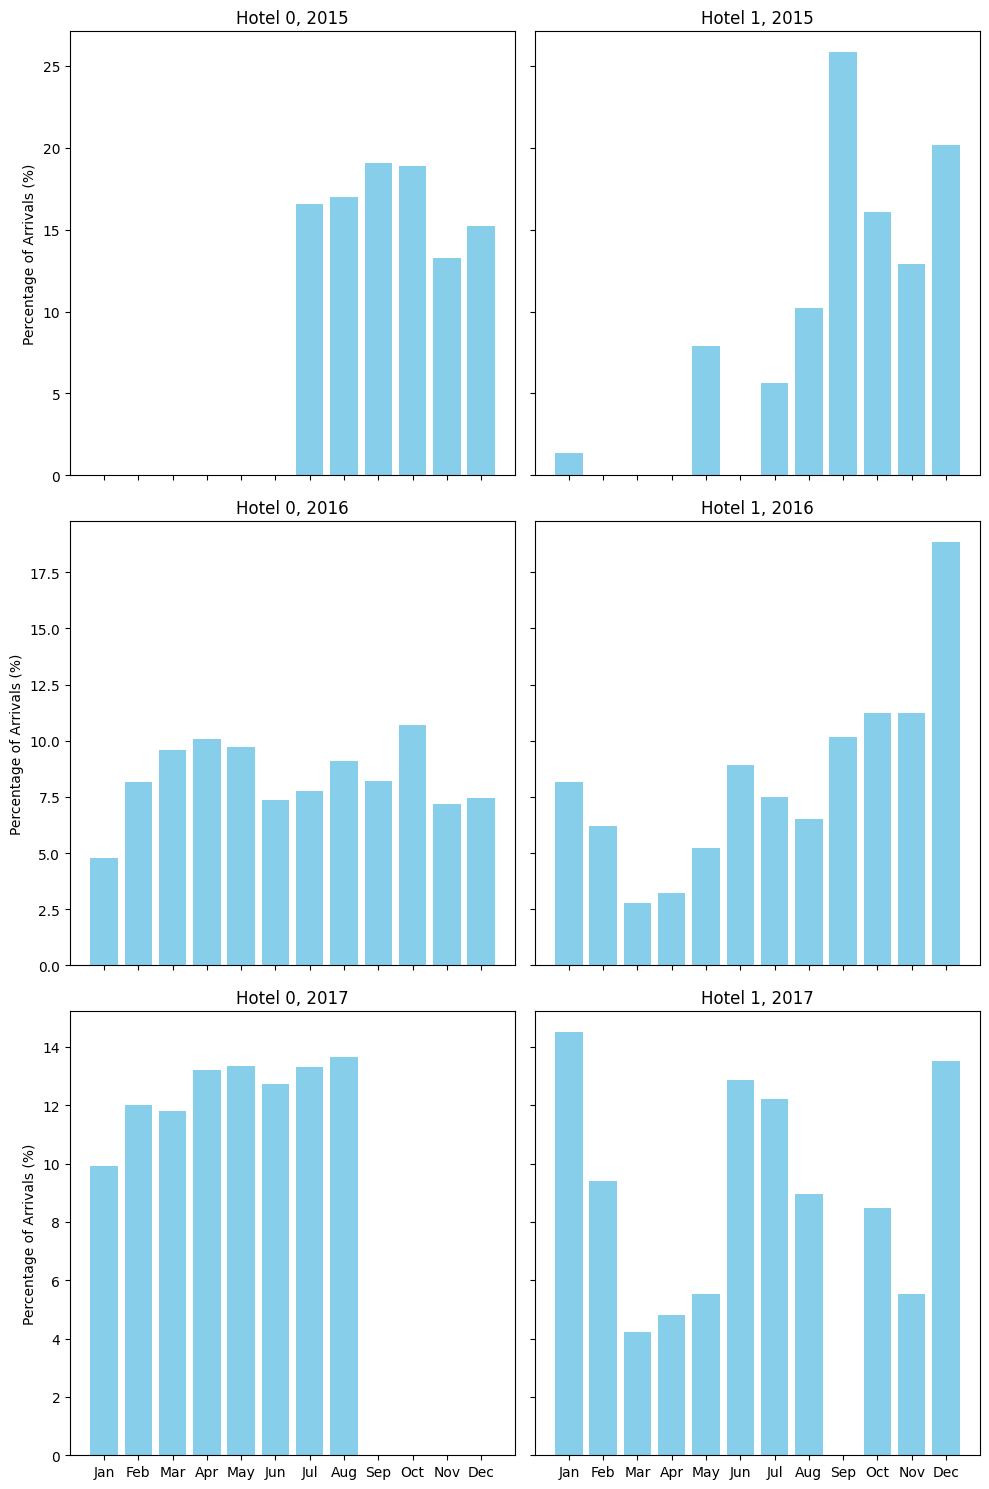

In [6]:
fig, axs = plt.subplots(num_years, num_hotels, figsize=(5 * num_hotels, 5 * num_years), sharex='col', sharey='row')

for i, year in enumerate(unique_years):
    for j, hotel_id in enumerate(unique_hotels):
        if num_years == 1 or num_hotels == 1:  
            ax = axs[max(i, j)]
        else:
            ax = axs[i, j]
        
        data = arrivals_percentage.xs((hotel_id, year), level=('hotel_id', 'arrival_year')).T
        
        ax.bar(data.index, data.values.flatten(), color='skyblue')
        ax.set_title(f'Hotel {hotel_id}, {year}')
        ax.set_xticks(range(1, 13))
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        if j == 0:
            ax.set_ylabel('Percentage of Arrivals (%)')

plt.tight_layout()
plt.show()

Posto najvise ljudi dolazi u decembru, verovatno je u pitanju Zagreb zbog adventa

## Provera anomalija

Prvo cemo pregledati u kojim mesecima se desilo da je broj dolazaka manji od 1% ukupnog broja dolazaka za tu godinu. Logika je da to ukazuje na neku gresku/anomaliju

In [7]:
print(arrivals_percentage)

arrival_month                 1          2          3          4          5   \
hotel_id arrival_year                                                          
0        2015           0.000000   0.000000   0.000000   0.000000   0.000000   
         2016           4.761905   8.182504   9.577677  10.057100   9.706960   
         2017           9.921057  12.016092  11.811143  13.223015  13.336876   
1        2015           1.369161   0.000000   0.000000   0.000000   7.870845   
         2016           8.171523   6.214036   2.777267   3.223942   5.210331   
         2017          14.497559   9.418494   4.241055   4.798513   5.523574   

arrival_month                 6          7          8          9          10  \
hotel_id arrival_year                                                          
0        2015           0.000000  16.584427  16.957516  19.075701  18.883139   
         2016           7.374488   7.762336   9.076708   8.204051  10.687352   
         2017          12.714438  13.31

In [20]:
anomalie_months = []

for (hotel_id, year), row in arrivals_percentage.iterrows():
    for month, percentage in row.items():
        if percentage < 1:
            anomalie_months.append((hotel_id, year, month, percentage))

anomalie_months_df = pd.DataFrame(anomalie_months, columns=['Hotel ID', 'Year', 'Month', 'Percentage'])

print(anomalie_months_df)

Months by hotel where the number of arrivals is less than 1% of all the arrivals in that hotel:
arrival_month           1    2    3    4    5    6   7   8    9    10   11  \
hotel_id arrival_year                                                        
0        2015          0.0  0.0  0.0  0.0  0.0  0.0 NaN NaN  NaN  NaN  NaN   
         2016          NaN  NaN  NaN  NaN  NaN  NaN NaN NaN  NaN  NaN  NaN   
         2017          NaN  NaN  NaN  NaN  NaN  NaN NaN NaN  0.0  0.0  0.0   
1        2015          NaN  0.0  0.0  0.0  NaN  0.0 NaN NaN  NaN  NaN  NaN   
         2016          NaN  NaN  NaN  NaN  NaN  NaN NaN NaN  NaN  NaN  NaN   
         2017          NaN  NaN  NaN  NaN  NaN  NaN NaN NaN  0.0  NaN  NaN   

arrival_month           12  
hotel_id arrival_year       
0        2015          NaN  
         2016          NaN  
         2017          0.0  
1        2015          NaN  
         2016          NaN  
         2017          NaN  


Mozemo videti da postoje meseci gde se desilo 0% dolazaka, sto verovatno znaci da se tu nisu ni pratili dolasci. Ovo treba nekako kompenzovati. Ideja je da meseci za koje nemamo podatke o dolascima uzmu kao vrednost, prosek dolazaka tog meseca u drugim godinama